####Pre-Lecture HW
1. Standard Error of the Mean evaluates how closely the sample is an accurate estimation of the population. Standard deviation is teh degree or scatter of data points relative to the mean. While they both measure variability, SD asses how spread out data points are compared to mean and SEM is about sample varaibility (distribution of means).



2. We can use the standard error of the mean to create a 95% confidence interval that covers 95% of bootstrapped sample means by calculating the mean and standard error, then determining the critical value (1.96) and multiplying it by the SEM and as a result constructing the confidence interval.

3. First, randomly sample 1,000 times with replacement each time calculating the mean and store it so you accumulate the distribution. The 95% confidence interval is in the 97.5 percentile of the means. Using np.quantile() qw can specify the cutoffs for the interval and calculate confidence interval.

In [2]:
import numpy as np

# Example sample data
sample = np.array([10, 12, 9, 15, 10, 11, 8, 13, 14, 9])

# Function to calculate bootstrap confidence interval
def bootstrap_ci(data, statistic_func, num_bootstrap_samples=1000, ci=0.95):
    """
    Calculate the bootstrap confidence interval for a given population parameter.
    
    Parameters:
    data (array-like): The sample data.
    statistic_func (function): A function to calculate the desired statistic (mean, median, etc.).
    num_bootstrap_samples (int): The number of bootstrap samples to generate.
    ci (float): The confidence level, default is 0.95 (95% CI).
    
    Returns:
    (float, float): The lower and upper bounds of the bootstrap confidence interval.
    """
    # Generate bootstrap samples and compute the statistic for each sample
    bootstrapped_statistics = []
    n = len(data)
    
    for _ in range(num_bootstrap_samples):
        # Create a bootstrap sample by sampling with replacement from the data
        bootstrap_sample = np.random.choice(data, size=n, replace=True)
        # Calculate the statistic for the bootstrap sample and store it
        bootstrapped_statistics.append(statistic_func(bootstrap_sample))
    
    # Calculate the lower and upper quantiles for the confidence interval
    lower_bound = np.quantile(bootstrapped_statistics, (1 - ci) / 2)
    upper_bound = np.quantile(bootstrapped_statistics, 1 - (1 - ci) / 2)
    
    return lower_bound, upper_bound

# Calculate 95% CI for the population mean
ci_mean = bootstrap_ci(sample, np.mean)
print(f"95% bootstrap confidence interval for the population mean: {ci_mean}")

# To calculate a 95% CI for a different parameter, change the statistic function passed in:

# Calculate 95% CI for the population median
ci_median = bootstrap_ci(sample, np.median)
print(f"95% bootstrap confidence interval for the population median: {ci_median}")


95% bootstrap confidence interval for the population mean: (9.7, 12.402499999999998)
95% bootstrap confidence interval for the population median: (9.0, 13.0)


Question 3 & 4, ChatGPT convo summary: We discussed creating a 95% bootstrap confidence interval using bootstrapped means and np.quantile() for the interval bounds, without relying on standard deviation. I provided Python code for calculating a 95% CI for the population mean, which can easily be adapted to other parameters (e.g., median, variance) by changing the statistic function. The main approach involves resampling, computing the statistic for each sample, and using quantiles to determine the CI.
https://chatgpt.com/c/66fa0fa2-c4e4-800f-8ee4-f1d96c292e17

5. We need to distinguish between the role of population parameter adn sample statistic when it comes to confidence intervals because a stat is an estimation based of the sample, whereas a parameter is a fixed value since it is based of the population but unknown at this stage.

6. You bootstrap when you want to estimate the sampling distribution of a stat (like the mean), make sure to do this a repreated amount of times (replacement is essential). THis makes it easier for out to make inferences about population parameters, with assessing an entire population. If you had to guess the size of the population from limited data you can, resample data (get multiple bootstrap samples), calculate sample stats construct a 95% confidence interval then pose a hypothesis.

7. Because the data is compatible with null hypothesis - zero is a plausible value of the true effect and that the observed sample mean may be due to chance or some random variation. Alternatively, if confidence interval does not cover zero, it can mean that the true effect is not zero leading us to reject the null hypothesis and explore the alternate.

8. Let's evaluate whether AliTech vaccine improves health. H0: AliTech vaccine does not improve health - there is no significant difference between the initial and final scores.


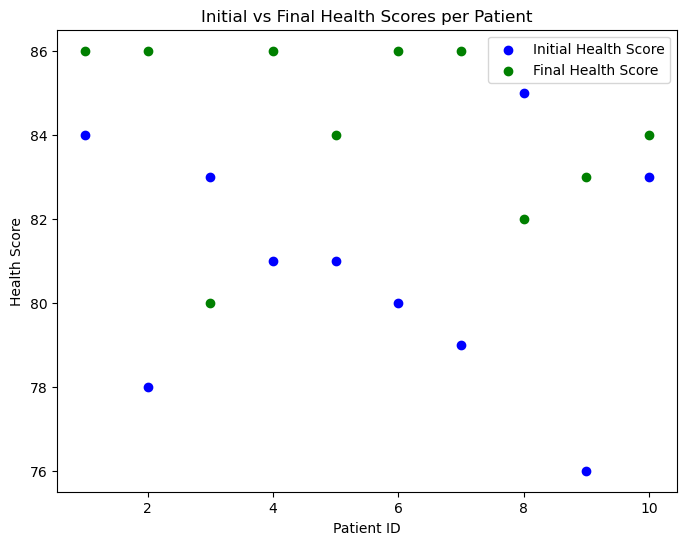

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame with the specified data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (this will not be included in your submission)
df.to_csv('vaccine_data.csv', index=False)

# Read the data from the CSV file
data = pd.read_csv('vaccine_data.csv')

# Create a scatter plot to compare Initial and Final Health Scores
plt.figure(figsize=(8, 6))
plt.scatter(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', color='blue')
plt.scatter(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', color='green')

# Add labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores per Patient')
plt.legend()

# Show plot
plt.show()


95% Confidence Interval for the health improvement: (0.7, 5.5)


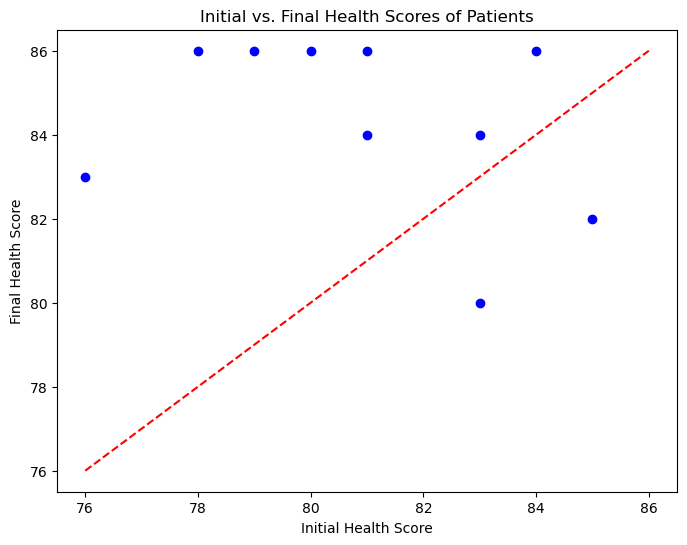

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('vaccine_data.csv')

# Set random seed for reproducibility
np.random.seed(42)

# Define the difference between final and initial health scores
data['HealthDifference'] = data['FinalHealthScore'] - data['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, num_samples=1000):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data['HealthDifference'], size=len(data), replace=True)
        means.append(np.mean(sample))
    return means

# Run the bootstrap
bootstrapped_means = bootstrap(data)

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrapped_means, 2.5)
upper_bound = np.percentile(bootstrapped_means, 97.5)

print(f"95% Confidence Interval for the health improvement: ({lower_bound}, {upper_bound})")

# Plotting the health scores
plt.figure(figsize=(8,6))
plt.scatter(data['InitialHealthScore'], data['FinalHealthScore'], color='blue')
plt.plot([min(data['InitialHealthScore']), max(data['FinalHealthScore'])],
         [min(data['InitialHealthScore']), max(data['FinalHealthScore'])],
         'r--')  # Reference line where Final = Initial
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.title('Initial vs. Final Health Scores of Patients')
plt.show()


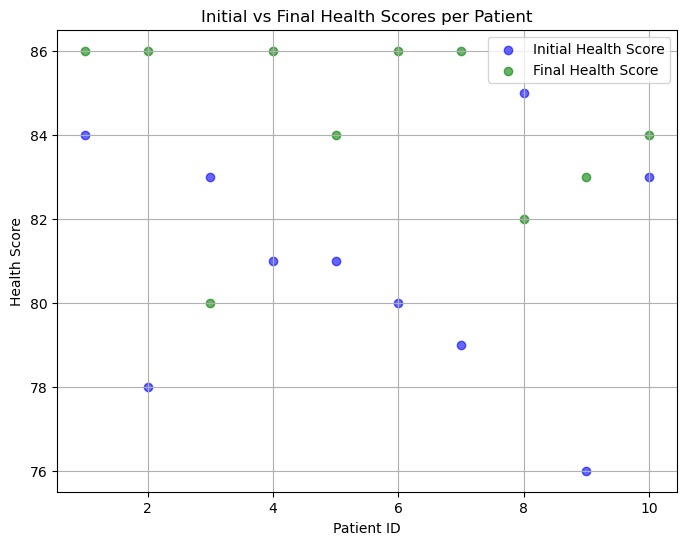

95% Confidence Interval for the mean improvement: [0.90, 5.60]


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the DataFrame with the specified data
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV (this will not be included in your submission)
df.to_csv('vaccine_data.csv', index=False)

# Read the data from the CSV file
data = pd.read_csv('vaccine_data.csv')

# Create a scatter plot to compare Initial and Final Health Scores
plt.figure(figsize=(8, 6))
plt.scatter(data['PatientID'], data['InitialHealthScore'], label='Initial Health Score', color='blue', alpha=0.6)
plt.scatter(data['PatientID'], data['FinalHealthScore'], label='Final Health Score', color='green', alpha=0.6)

# Add labels and title
plt.xlabel('Patient ID')
plt.ylabel('Health Score')
plt.title('Initial vs Final Health Scores per Patient')
plt.legend()
plt.grid()

# Show plot
plt.show()

# Bootstrapping to find the confidence interval for the mean improvement
np.random.seed(42)  # Set seed for reproducibility
df['Improvement'] = df['FinalHealthScore'] - df['InitialHealthScore']

n_iterations = 10000
sample_size = len(df)
bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(df['Improvement'], size=sample_size, replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculate 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

print(f'95% Confidence Interval for the mean improvement: [{lower_bound:.2f}, {upper_bound:.2f}]')


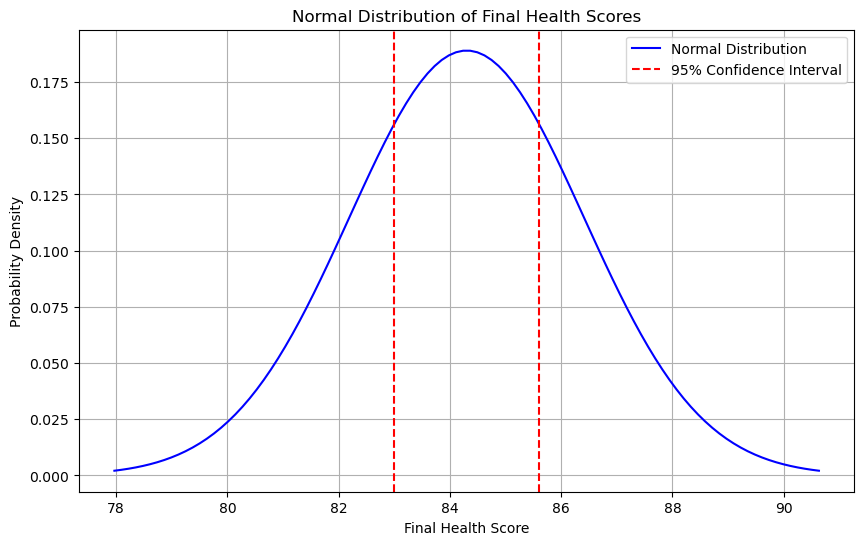

95% Confidence Interval: (82.99172505986006, 85.60827494013994)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the data directly
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Calculate mean and standard deviation of FinalHealthScore
mean_score = df['FinalHealthScore'].mean()
std_dev = df['FinalHealthScore'].std()

# Generate x values for the normal distribution
x = np.linspace(mean_score - 3*std_dev, mean_score + 3*std_dev, 100)

# Calculate the normal distribution
y = stats.norm.pdf(x, mean_score, std_dev)

# Plot the normal distribution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Normal Distribution', color='blue')
plt.title('Normal Distribution of Final Health Scores')
plt.xlabel('Final Health Score')
plt.ylabel('Probability Density')
plt.grid()

# Calculate the 95% confidence interval
conf_interval = stats.norm.interval(0.95, loc=mean_score, scale=std_dev/np.sqrt(len(df)))

# Add confidence interval to the plot
plt.axvline(conf_interval[0], color='red', linestyle='--', label='95% Confidence Interval')
plt.axvline(conf_interval[1], color='red', linestyle='--')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Print the confidence interval
print(f"95% Confidence Interval: {conf_interval}")


H0:Final Health Scores are normally distributed
HA: Final Health Scores are not normally distributed.

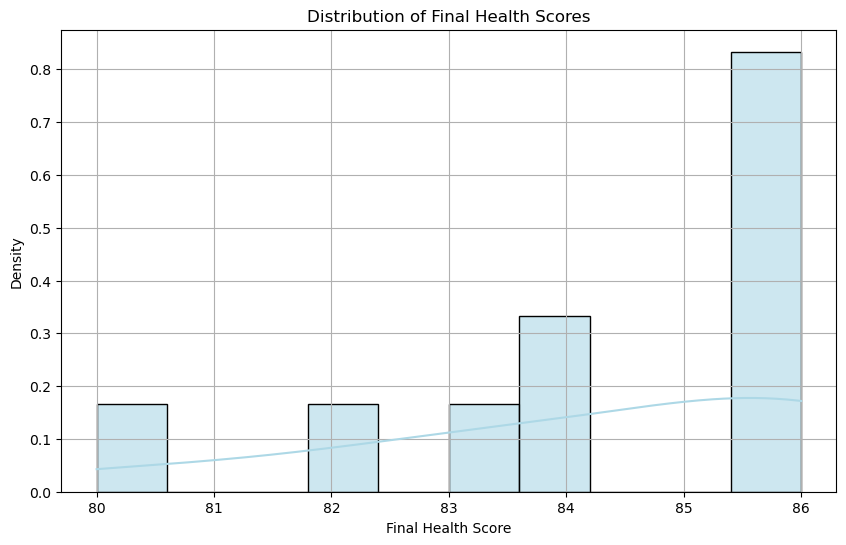

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data directly
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Create a figure
plt.figure(figsize=(10, 6))

# Create a histogram of the Final Health Scores
sns.histplot(df['FinalHealthScore'], bins=10, kde=True, color='lightblue', stat='density', alpha=0.6)

# Add a title and labels
plt.title('Distribution of Final Health Scores')
plt.xlabel('Final Health Score')
plt.ylabel('Density')
plt.grid()

# Show the plot
plt.show()


9. I've referenced the Wiki-textbook a few times.

ChatGPT Summary: 
In our conversation, you sought assistance with a data analysis assignment for a vaccine developed by AliTech. You provided a dataset and requested guidance on creating a CSV file, visualizing health scores through a scatter plot, and conducting a bootstrapping analysis to estimate confidence intervals for mean improvements. I provided code that addressed these requirements, ensuring reproducibility with a random seed and including necessary data visualizations and analyses.
Link:https://chatgpt.com/c/66fa0fa2-c4e4-800f-8ee4-f1d96c292e17